In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
types of cars involved in crashes or at-fault count based on age and sex..



In [4]:
con = sqlite3.connect("Data/switrs.sqlite")



In [5]:
query = ('''SELECT party_age, COUNT(*) AS ct
    FROM parties
    WHERE at_fault
    GROUP BY party_age''')
df = pd.read_sql_query(query, con)
df.dropna(inplace=True)


#OUTPUT USING PlotBar(x = ["party_age"], order_by=["party_age"], title="At-fault Age")



In [6]:
df[['party_age', 'ct']]




,party_age,ct
1,0.0,810
2,1.0,359
3,2.0,1027
4,3.0,1386
5,4.0,1750
...,...,...
117,120.0,6
118,121.0,2
119,122.0,1
120,123.0,2


Text(0.5, 1.0, 'Party At Fault Age')

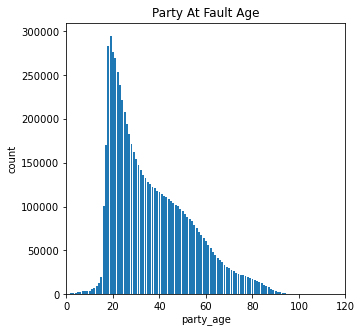

In [7]:
plt.figure(figsize=(5,5))
plt.bar(x = df["party_age"], height =df["ct"])
plt.xlabel("party_age")
plt.ylabel("count")
plt.xlim([0, 120])
plt.title("Party At Fault Age")
#df.plot.bar('party_age', 'ct', figsize = (15,12))





In [8]:
query =( '''SELECT party_age,
    SUM(CASE WHEN party_sex="male" THEN 0 ELSE 1 END) AS female,
    SUM(CASE WHEN party_sex="male" THEN 1 ELSE 0 END) AS male
    FROM parties 
    WHERE at_fault AND party_sex IN ('male', 'female')
    GROUP BY party_age''')


In [9]:
age_sex = pd.read_sql_query(query, con)


TypeError: '>' not supported between instances of 'str' and 'int'

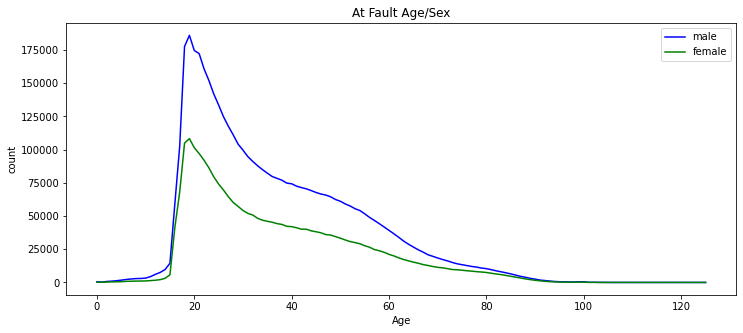

In [11]:
plt.figure(figsize=(12,5))
plt.plot(age_sex["party_age"], age_sex["male"], color='blue', label = "male")
plt.plot(age_sex["party_age"], age_sex["female"],color='green', label = "female")

plt.xlabel("Age")
plt.ylabel("count")
#plt.xlim([0, 120])
plt.title("At Fault Age/Sex")
plt.legend()

#fix age issue

In [22]:
query =( '''SELECT party_age,
    SUM(CASE WHEN party_sex="male" THEN 0 ELSE 1 END) AS female,
    SUM(CASE WHEN party_sex="male" THEN 1 ELSE 0 END) AS male
    FROM parties 
    WHERE party_sobriety IN ('B', 'D', 'C' )AND at_fault AND party_sex IN ('male', 'female')
    GROUP BY party_age''')
alcohol_use = pd.read_sql_query(query, con)
alcohol_use.dropna(inplace=True)

In [ ]:
A - Had Not Been Drinking
B - Had Been Drinking, Under Influence
C - Had Been Drinking, Not Under Influence
D - Had Been Drinking, Impairment Unknown
G - Impairment Unknown
H - Not Applicable

In [35]:
age = alcohol_use[alcohol_use['party_age']> 12]

age


,party_age,female,male
14,13.0,48,83
15,14.0,73,243
16,15.0,171,657
17,16.0,726,2165
18,17.0,1594,5445
...,...,...,...
103,102.0,3,6
104,103.0,2,6
105,104.0,0,3
106,105.0,0,3


In [ ]:
Hyp: There is a correlation b/t number of collisions and age;
     Adult males who are 21 years old have the highest average number of collisions compared to middle aged people (30-35)
Alt Hyp: There is no difference between mean number of collisions for men who are 21 age/other
    
    
#parties - cellphone_use
    

In [ ]:
# why data with people under 18 at fault  - drop? how is data gathered? sum of people under age 12 and 12-18

In [ ]:
-pick a narrative angle you want to explore - story telling explore the heck out of it
compare adult women 21 to middle aged people
-relationship b/t age and other variables

sample of counties - group lat/long 

can't do hyp test

#number of 21 year old males in CA who not crashed compare people born in 1999 with 1975-1985 - these people may not 
live in CA; CA pop grown, drawbacks of choosing births - dying, people moving in/out CA



